In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("E:\\brijesh\\New folder\\train.csv")
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [3]:
df.shape

(29451, 12)

In [4]:
df1=df.drop(['POSTED_BY','UNDER_CONSTRUCTION','RERA','READY_TO_MOVE','RESALE','LONGITUDE','LATITUDE'],axis='columns')
df1.head()

,BHK_NO.,BHK_OR_RK,SQUARE_FT,ADDRESS,TARGET(PRICE_IN_LACS)
0,2,BHK,1300.236407,"Ksfc Layout,Bangalore",55.0
1,2,BHK,1275.000000,"Vishweshwara Nagar,Mysore",51.0
2,2,BHK,933.159722,"Jigani,Bangalore",43.0
3,2,BHK,929.921143,"Sector-1 Vaishali,Ghaziabad",62.5
4,2,BHK,999.009247,"New Town,Kolkata",60.5


In [5]:
df1.isnull().sum()

BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
ADDRESS                  0
TARGET(PRICE_IN_LACS)    0
dtype: int64

In [6]:
df1['BHK_NO.'].unique()

array([ 2,  3,  1,  4,  5,  6, 12,  8, 20, 10,  7,  9, 13, 17, 15, 11],
      dtype=int64)

In [7]:
df1['SQUARE_FT'].describe()

count    2.945100e+04
mean     1.980217e+04
std      1.901335e+06
min      3.000000e+00
25%      9.000211e+02
50%      1.175057e+03
75%      1.550688e+03
max      2.545455e+08
Name: SQUARE_FT, dtype: float64

C:\Users\jagvir sinhj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BHK_NO.', ylabel='SQUARE_FT'>

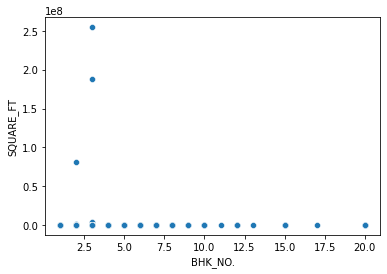

In [19]:
sns.scatterplot(df1['BHK_NO.'],df1['SQUARE_FT'])

In [8]:
df1['PRICE_PER_SQR_FT']=(df1['TARGET(PRICE_IN_LACS)']*100000)/df1['SQUARE_FT']
df1.head()

,BHK_NO.,BHK_OR_RK,SQUARE_FT,ADDRESS,TARGET(PRICE_IN_LACS),PRICE_PER_SQR_FT
0,2,BHK,1300.236407,"Ksfc Layout,Bangalore",55.0,4229.999999
1,2,BHK,1275.000000,"Vishweshwara Nagar,Mysore",51.0,4000.000000
2,2,BHK,933.159722,"Jigani,Bangalore",43.0,4608.000000
3,2,BHK,929.921143,"Sector-1 Vaishali,Ghaziabad",62.5,6721.000000
4,2,BHK,999.009247,"New Town,Kolkata",60.5,6056.000000


In [9]:
df1['PRICE_PER_SQR_FT'].describe()

count     29451.000000
mean       7503.938338
std       10847.976910
min           1.000000
25%        3551.500001
50%        5095.000000
75%        8055.000000
max      900000.000000
Name: PRICE_PER_SQR_FT, dtype: float64

In [10]:
def remove_area_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('ADDRESS'):
        m = np.mean(subdf.PRICE_PER_SQR_FT)
        sd = np.std(subdf.PRICE_PER_SQR_FT)
        reduced_df = subdf[(subdf.PRICE_PER_SQR_FT > (m-sd)) & (subdf.PRICE_PER_SQR_FT < (m+sd))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out


In [11]:
df2 = remove_area_outliers(df1)
df2.shape

(16549, 6)

In [12]:
df2['PRICE_PER_SQR_FT'].describe()

count     16549.000000
mean       7225.587709
std        6359.513904
min         232.000000
25%        3651.999999
50%        5238.000001
75%        7964.000002
max      109757.000004
Name: PRICE_PER_SQR_FT, dtype: float64

C:\Users\jagvir sinhj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BHK_NO.', ylabel='PRICE_PER_SQR_FT'>

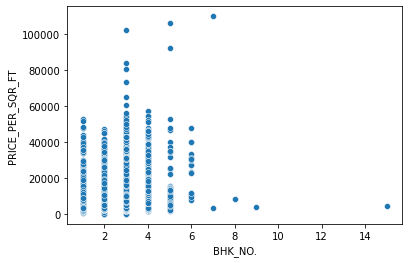

In [17]:
sns.scatterplot(df2['BHK_NO.'],df2['PRICE_PER_SQR_FT'])

(array([1.407e+04, 1.951e+03, 3.510e+02, 1.150e+02, 5.100e+01, 4.000e+00,
        1.000e+00, 2.000e+00, 1.000e+00, 3.000e+00]),
 array([   232.00000001,  11184.50000046,  22137.0000009 ,  33089.50000134,
         44042.00000179,  54994.50000223,  65947.00000267,  76899.50000312,
         87852.00000356,  98804.500004  , 109757.00000445]),
 <BarContainer object of 10 artists>)

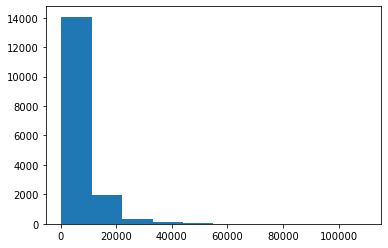

In [54]:
plt.hist(df2['PRICE_PER_SQR_FT'])

In [21]:
def check_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [22]:
df2[(df2['SQUARE_FT'].apply(check_float))]

,BHK_NO.,BHK_OR_RK,SQUARE_FT,ADDRESS,TARGET(PRICE_IN_LACS),PRICE_PER_SQR_FT
0,3,BHK,2600.104004,"1st Block Jayanagar,Bangalore",450.0,17307.000001
1,3,BHK,2470.588235,"1st Block Jayanagar,Bangalore",420.0,17000.000002
2,2,BHK,1149.095088,"1st Block Jayanagar,Bangalore",120.0,10442.999997
3,3,BHK,3200.000000,"1st Block Jayanagar,Bangalore",460.0,14375.000000
4,3,BHK,2569.435948,"1st Block Jayanagar,Bangalore",420.0,16345.999998
...,...,...,...,...,...,...
16544,3,BHK,1529.689890,"sector-121 Noida,Noida",110.0,7191.000001
16545,4,BHK,3065.010486,"sector-121 Noida,Noida",190.0,6198.999999
16546,3,BHK,2427.184466,"sector-58 Gurgaon,Gurgaon",250.0,10300.000000
16547,3,BHK,3016.591252,"sector-58 Gurgaon,Gurgaon",320.0,10608.000000


In [23]:
house_type = df2.groupby('BHK_OR_RK')['BHK_OR_RK'].agg('count')
house_type

BHK_OR_RK
BHK    16540
RK         9
Name: BHK_OR_RK, dtype: int64

In [24]:
df2.BHK_OR_RK = df2.BHK_OR_RK.apply(lambda x: 0 if x=='BHK' else 1)
## BHK = 0 and RK = 1

In [25]:
df2

,BHK_NO.,BHK_OR_RK,SQUARE_FT,ADDRESS,TARGET(PRICE_IN_LACS),PRICE_PER_SQR_FT
0,3,0,2600.104004,"1st Block Jayanagar,Bangalore",450.0,17307.000001
1,3,0,2470.588235,"1st Block Jayanagar,Bangalore",420.0,17000.000002
2,2,0,1149.095088,"1st Block Jayanagar,Bangalore",120.0,10442.999997
3,3,0,3200.000000,"1st Block Jayanagar,Bangalore",460.0,14375.000000
4,3,0,2569.435948,"1st Block Jayanagar,Bangalore",420.0,16345.999998
...,...,...,...,...,...,...
16544,3,0,1529.689890,"sector-121 Noida,Noida",110.0,7191.000001
16545,4,0,3065.010486,"sector-121 Noida,Noida",190.0,6198.999999
16546,3,0,2427.184466,"sector-58 Gurgaon,Gurgaon",250.0,10300.000000
16547,3,0,3016.591252,"sector-58 Gurgaon,Gurgaon",320.0,10608.000000


C:\Users\jagvir sinhj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BHK_OR_RK', ylabel='PRICE_PER_SQR_FT'>

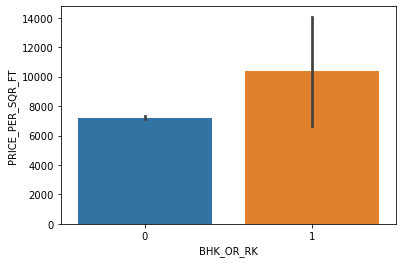

In [30]:
sns.barplot(df2.BHK_OR_RK,df2.PRICE_PER_SQR_FT)

In [31]:
len(df2.ADDRESS.unique())

2373

In [32]:
different_loc = df2.groupby('ADDRESS')['ADDRESS'].agg('count').sort_values(ascending=False)
different_loc

ADDRESS
Zirakpur,Chandigarh              341
Raj Nagar Extension,Ghaziabad    165
Whitefield,Bangalore             144
New Town,Kolkata                 109
Sector-137 Noida,Noida            98
                                ... 
Dairy Circle,Bangalore             1
Dahisar,Lalitpur                   1
Sector-22 Gurgaon,Gurgaon          1
Madhavpura,Vadodara                1
Rambaug Colony,Pune                1
Name: ADDRESS, Length: 2373, dtype: int64

In [36]:
loc_stats_less_than_20 = different_loc[different_loc<20]
len(loc_stats_less_than_20)

2188

In [37]:
df2.ADDRESS = df2.ADDRESS.apply(lambda x: 'other' if x in loc_stats_less_than_20 else x)

In [38]:
len(df2.ADDRESS.unique())

186

In [39]:
dummies = pd.get_dummies(df2.ADDRESS)
dummies.head(2)

,"7th Phase JP Nagar,Bangalore","Adajan,Surat","Ahinsa Khand 1,Ghaziabad","Ahinsa Khand 2,Ghaziabad","Ajmer Road,Jaipur","Akshaya Nagar,Bangalore","Alwar Bypass Road,Bhiwadi","Balewadi,Pune","Balkum,Lalitpur","Balkum,Maharashtra",...,"Wadala,Mumbai","Wagholi,Pune","Wakad,Pune","Whitefield,Bangalore","Worli,Lalitpur","Yelahanka,Bangalore","Zirakpur,Chandigarh","Zirakpur,Mohali",other,"sector-121 Noida,Noida"
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [40]:
df3=pd.concat([df2,dummies.drop(['other'],axis='columns')],axis='columns')
df3.head()

,BHK_NO.,BHK_OR_RK,SQUARE_FT,ADDRESS,TARGET(PRICE_IN_LACS),PRICE_PER_SQR_FT,"7th Phase JP Nagar,Bangalore","Adajan,Surat","Ahinsa Khand 1,Ghaziabad","Ahinsa Khand 2,Ghaziabad",...,"Virar West,Lalitpur","Wadala,Mumbai","Wagholi,Pune","Wakad,Pune","Whitefield,Bangalore","Worli,Lalitpur","Yelahanka,Bangalore","Zirakpur,Chandigarh","Zirakpur,Mohali","sector-121 Noida,Noida"
0,3,0,2600.104004,other,450.0,17307.000001,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,0,2470.588235,other,420.0,17000.000002,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,1149.095088,other,120.0,10442.999997,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,3200.000000,other,460.0,14375.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,0,2569.435948,other,420.0,16345.999998,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
df3.shape

(16549, 191)

In [42]:
df4 = df3.drop(['PRICE_PER_SQR_FT','ADDRESS'],axis='columns')

In [43]:
X=df4.drop('TARGET(PRICE_IN_LACS)',axis='columns')

In [46]:
X.head()

,BHK_NO.,BHK_OR_RK,SQUARE_FT,"7th Phase JP Nagar,Bangalore","Adajan,Surat","Ahinsa Khand 1,Ghaziabad","Ahinsa Khand 2,Ghaziabad","Ajmer Road,Jaipur","Akshaya Nagar,Bangalore","Alwar Bypass Road,Bhiwadi",...,"Virar West,Lalitpur","Wadala,Mumbai","Wagholi,Pune","Wakad,Pune","Whitefield,Bangalore","Worli,Lalitpur","Yelahanka,Bangalore","Zirakpur,Chandigarh","Zirakpur,Mohali","sector-121 Noida,Noida"
0,3,0,2600.104004,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,0,2470.588235,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,1149.095088,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,3200.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,0,2569.435948,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
y=df4['TARGET(PRICE_IN_LACS)']
y.head()

0    450.0
1    420.0
2    120.0
3    460.0
4    420.0
Name: TARGET(PRICE_IN_LACS), dtype: float64

In [48]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [56]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8526392624693463